# Exploratory Data Analysis (Iris Dataset)

## Univariate Non-graphical Method

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
df.shape

(150, 5)

**The shape of the data frame tells us that:**
* there are 150 rows
* there are 5 columns

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**The info of the dataset tells us that:**
* Four features are numerical (float64), suitable for statistical analysis and machine learning.
* Species is categorical, likely representing the iris types (Setosa, Versicolor, Virginica).

* No Missing Values: All columns have 150 non-null entries → the dataset is complete.


In [78]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**The descriptive statistics of the dataset shows that:**
- Petal features show much greater variability than sepal features, especially petal length.
- Sepal width has the smallest spread, suggesting it's more consistent across samples.
- Sepal Length & Petal Length: Median (50%) is close to the mean → likely symmetric distribution.
- Sepal Width: Mean (3.05) < Median (3.00) → slight left skew.
- Petal Width: Mean (1.20) < Median (1.30) → slight right skew.


In [79]:
df.describe(include=["O"])

,species
count,150
unique,3
top,Iris-setosa
freq,50


**The categorical variable tells us that:**
- The dataset is evenly distributed across the three species, assuming the other two also have 50 samples each.
- This balance makes it ideal for classification tasks, as no class dominates the dataset.
- Iris-setosa appears most frequently in this summary, but likely just alphabetically or by default sorting—not due to imbalance.

In [80]:
quant_col = df.columns[df.dtypes != 'object']
for col in quant_col:
    print(f"Mode for {col}")
    print(df[col].mode())
    print("\n")
    print(f"Skewness for {col}")
    print(df[col].skew())
    print("\n")
    print(f"Kurtosis for {col}")
    print(df[col].kurtosis())
    print("\n")
    print("------------------------")
    print("\n")

Mode for sepal_length
0    5.0
Name: sepal_length, dtype: float64


Skewness for sepal_length
0.3149109566369728


Kurtosis for sepal_length
-0.5520640413156395


------------------------


Mode for sepal_width
0    3.0
Name: sepal_width, dtype: float64


Skewness for sepal_width
0.3340526621720866


Kurtosis for sepal_width
0.2907810623654279


------------------------


Mode for petal_length
0    1.5
Name: petal_length, dtype: float64


Skewness for petal_length
-0.27446425247378287


Kurtosis for petal_length
-1.4019208006454036


------------------------


Mode for petal_width
0    0.2
Name: petal_width, dtype: float64


Skewness for petal_width
-0.10499656214412734


Kurtosis for petal_width
-1.3397541711393433


------------------------




**The mode, skew, and kurtosis shows that:**
- Petal features (especially length and width) show flatter distributions and more spread, which supports their usefulness in species classification.
- Sepal features are more tightly clustered and closer to normality, with mild skewness and moderate kurtosis.
- The modes of petal features align with Setosa’s distinctively smaller petals, hinting at class separation.

In [81]:
# Interquatile Range (IQR)
for col in quant_col:
    Q3, Q1 = np.percentile(df[col], [75, 25])
    IQR = Q3 - Q1
    print(f"IQR for {col}: {IQR}")

IQR for sepal_length: 1.3000000000000007
IQR for sepal_width: 0.5
IQR for petal_length: 3.4999999999999996
IQR for petal_width: 1.5


**The IQR shows that:**
- Petal features (length and width) have much higher IQRs, confirming they vary more across samples — especially between species.
- Sepal width is the most consistent feature, with the smallest IQR.
- These insights support the idea that petal dimensions are more powerful predictors in species classification tasks

## Univariate Graphical Method

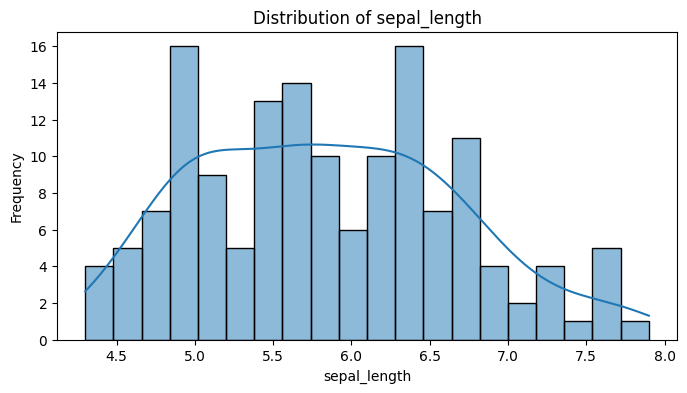

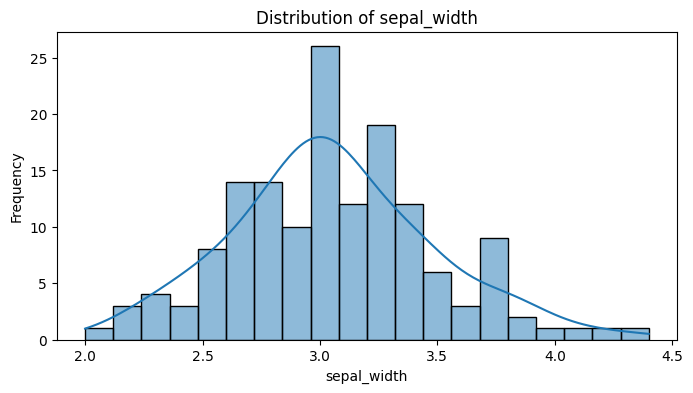

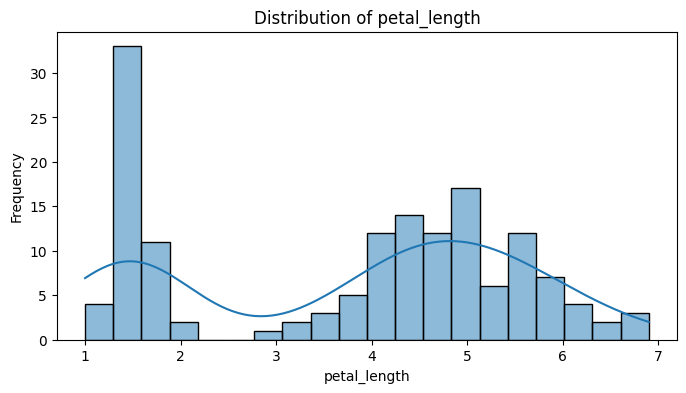

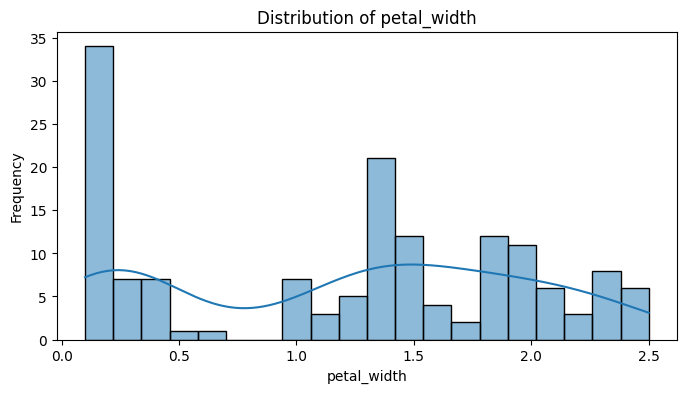

In [82]:
for col in quant_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Christopher Onyeneke\AppData\Local\Temp\ipykernel_16692\447093318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


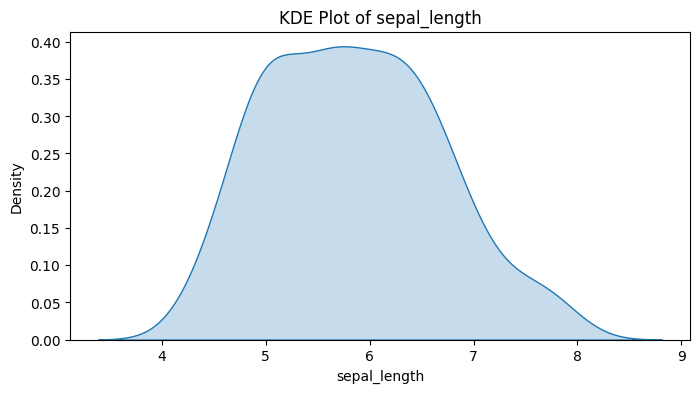

C:\Users\Christopher Onyeneke\AppData\Local\Temp\ipykernel_16692\447093318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


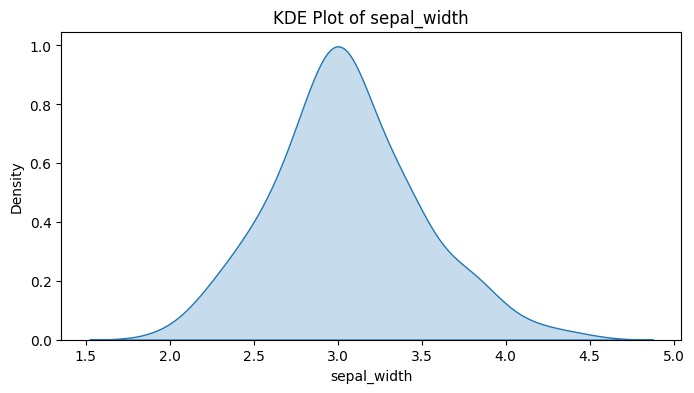

C:\Users\Christopher Onyeneke\AppData\Local\Temp\ipykernel_16692\447093318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


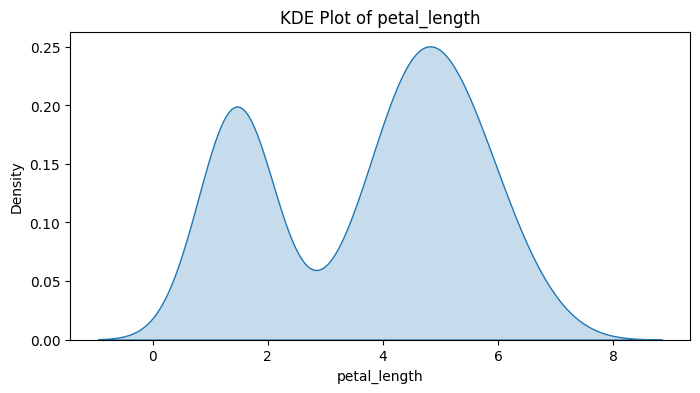

C:\Users\Christopher Onyeneke\AppData\Local\Temp\ipykernel_16692\447093318.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


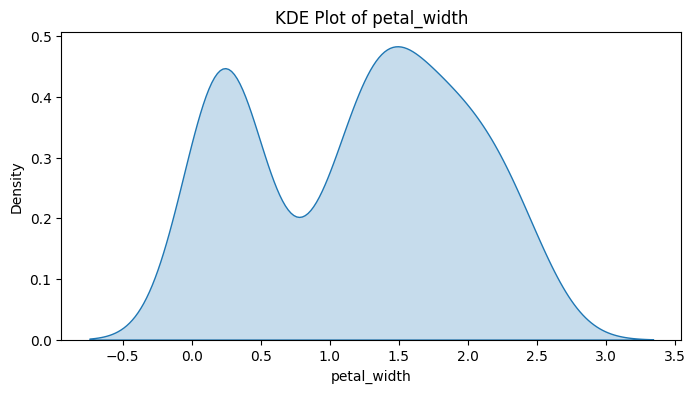

In [83]:
#KDE Plots
for col in quant_col:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

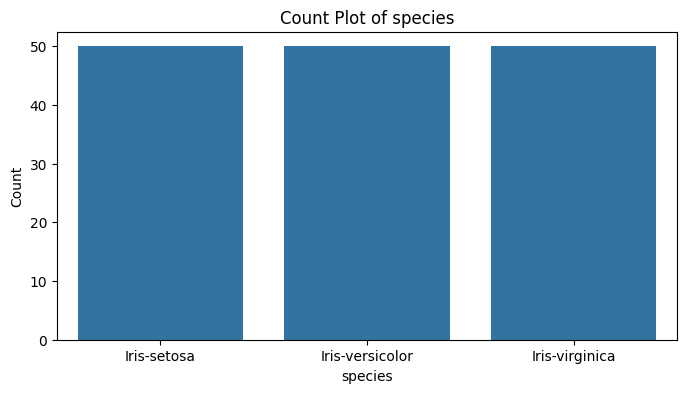

In [84]:
# Graph for Categorical Variable
categorical_col = df.select_dtypes(include=['object']).columns
for col in categorical_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

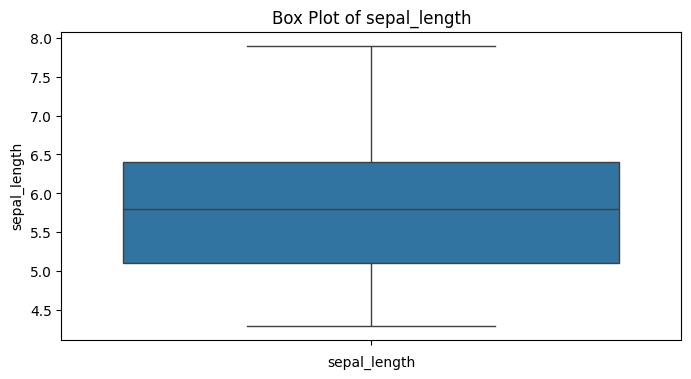

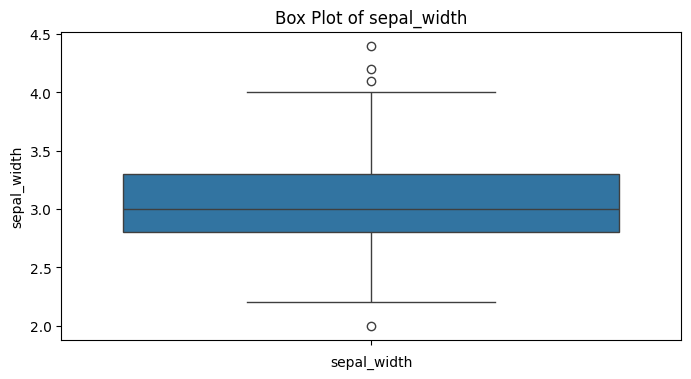

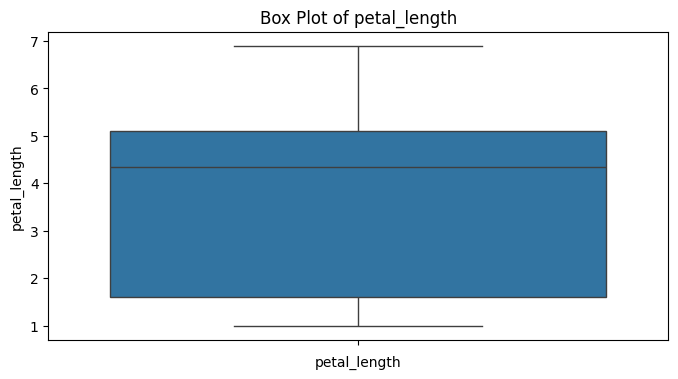

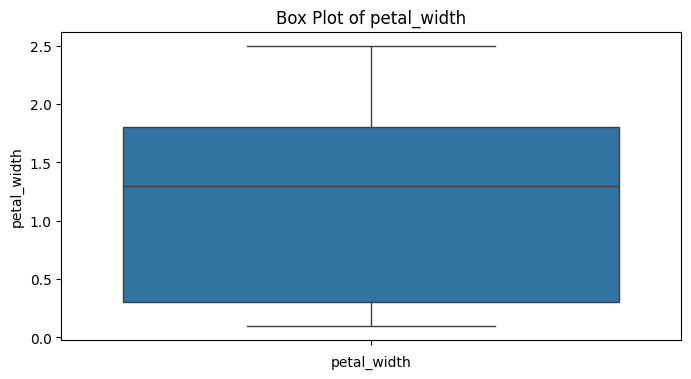

In [85]:
# Box Plots
for col in quant_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

**Key Takeaways from Box Plots**
- Petal features (length and width) show greater spread, making them more useful for distinguishing species.
- Sepal width is the most consistent but has a few outliers.
- No severe skewness in any feature, but petal dimensions hint at multi-modal distributions, likely reflecting species clusters

## Mulivariate Graphical Method

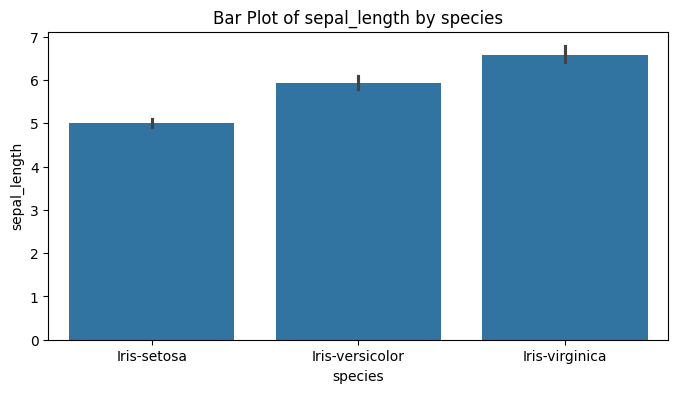

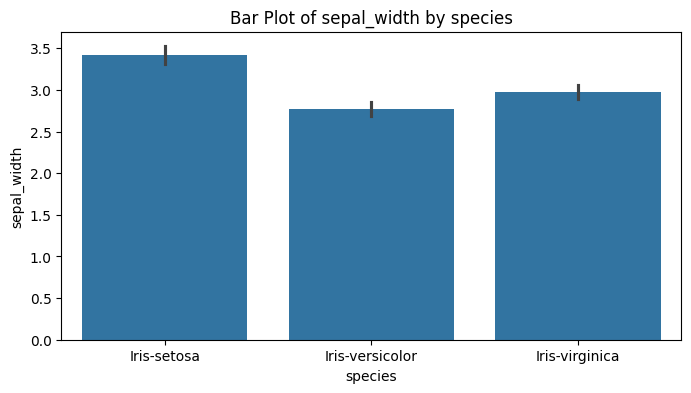

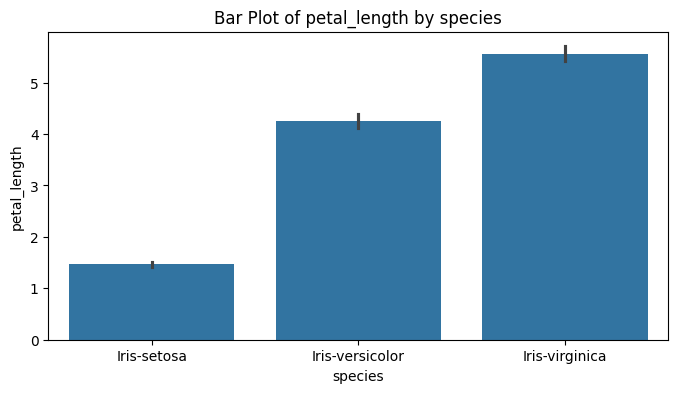

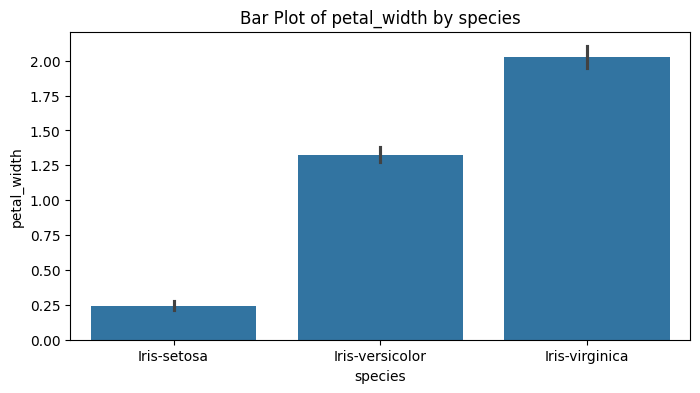

In [86]:
# Categorical vs Numerical
for cat_col in categorical_col:
    for num_col in quant_col:
        plt.figure(figsize=(8, 4))
        sns.barplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Bar Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

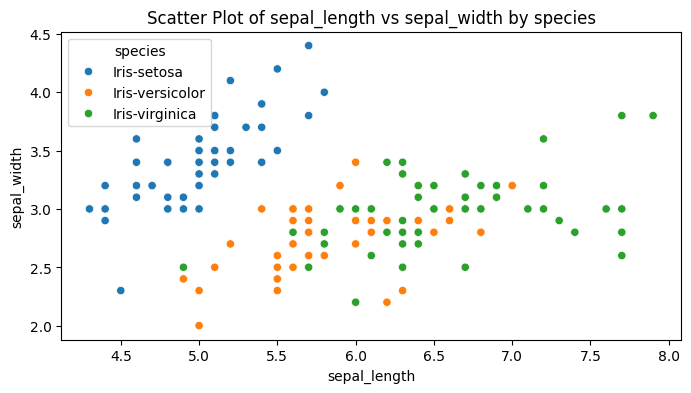

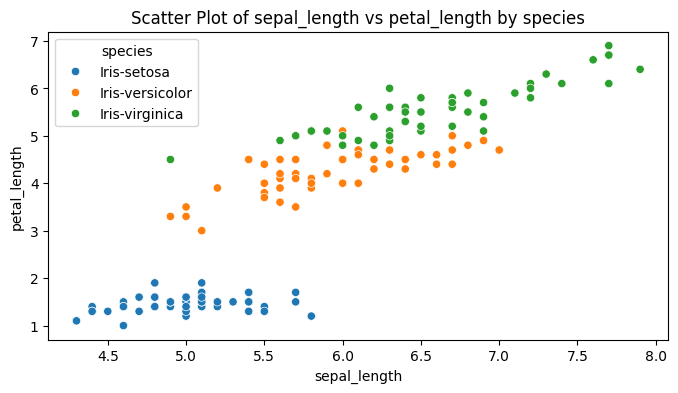

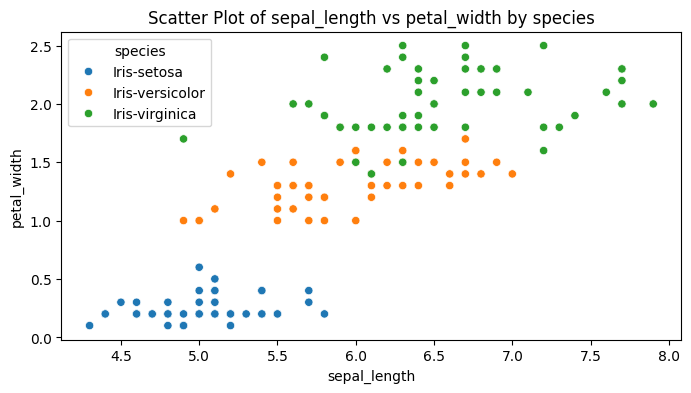

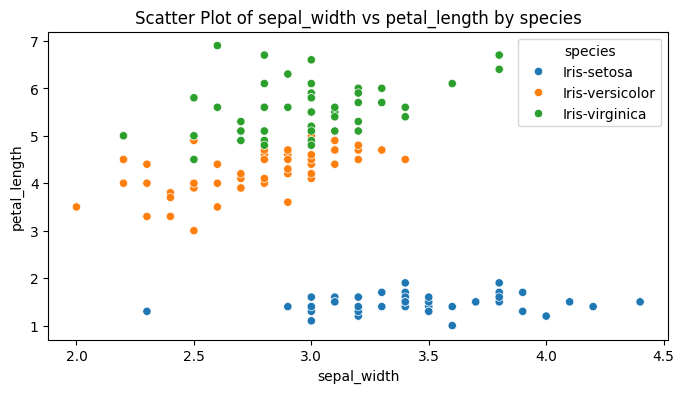

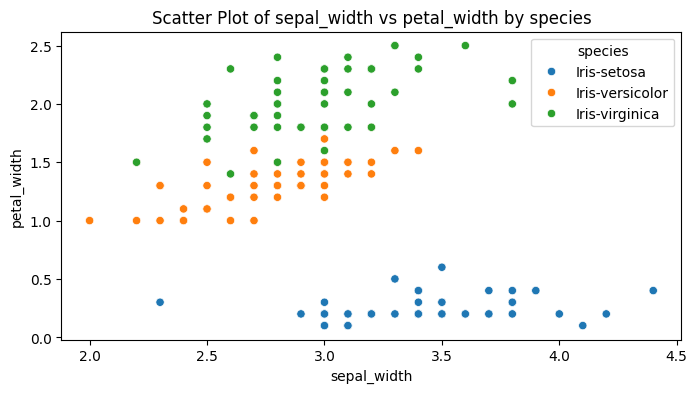

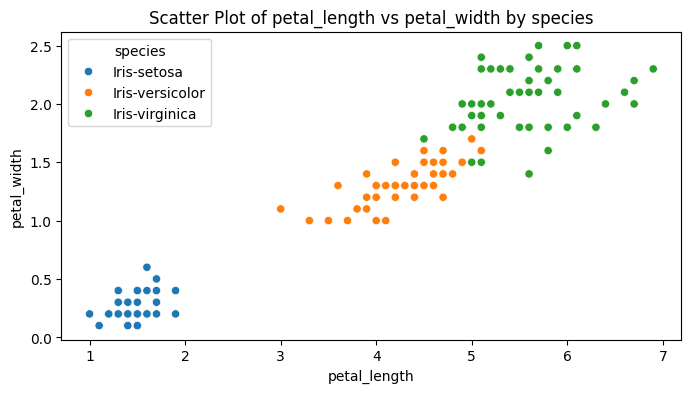

In [87]:
# Two Quantitative Variables
# Scatter Plots
for i in range(len(quant_col)):
    for j in range(i + 1, len(quant_col)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=df[quant_col[i]], y=df[quant_col[j]], hue=df[categorical_col[0]])
        plt.title(f'Scatter Plot of {quant_col[i]} vs {quant_col[j]} by {categorical_col[0]}')
        plt.xlabel(quant_col[i])
        plt.ylabel(quant_col[j])
        plt.show()

**Key Takeaways from the Scatter Plots**
- Setosa is easily distinguishable in all plots due to its small petal size and wider sepals.
- Versicolor and Virginica require petal-based features for clearer separation.
- The petal length vs petal width plot is the most informative for species classification

In [88]:
# Categorical Encoding
df['species'] = df['species'].astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


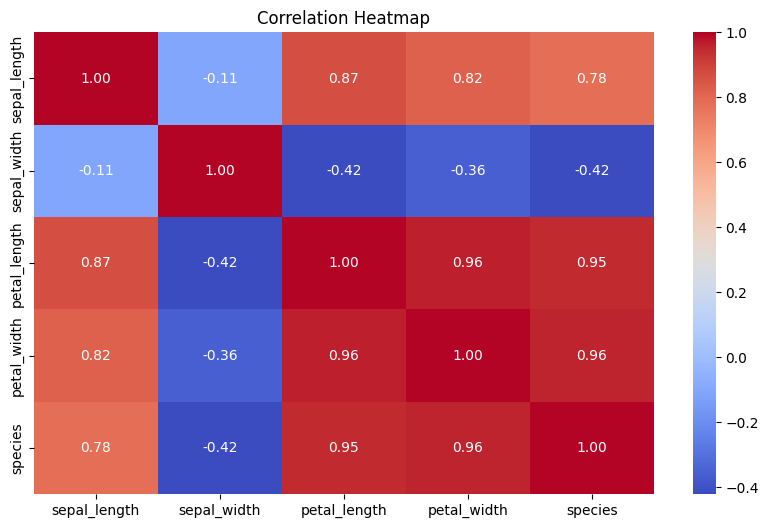

In [89]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insights from Correlation Heatmap**
- Petal length vs. petal width: Very high correlation (close to +1.00)
→ These two features increase together and are likely measuring related aspects of flower morphology.
- Petal length vs. species: Strong positive correlation
→ Longer petals are associated with species like Virginica, which tend to have larger flowers.
- Petal width vs. species: Also strongly correlated
→ Wider petals help distinguish between species, especially Setosa vs. Virginica.
